<a href="https://colab.research.google.com/github/takao8/MLTSA_JClifford/blob/master/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
cd gdrive/My\ Drive/

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/gdrive/My Drive


In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))       # opens our kaggle.json file
os.environ["KAGGLE_USERNAME"] = envs['username']   #gets our username from the json file
os.environ["KAGGLE_KEY"] = envs['key']     #gets our key

In [20]:
cd MLSTA1/HW2/data/Stocks/

[Errno 2] No such file or directory: 'MLSTA1/HW2/data/Stocks/'
/content/gdrive/My Drive/MLSTA1/HW2/data


In [0]:
files = os.listdir()  # get the list of text files
files = np.sort(files)

In [0]:
# setting up reading them sequentially
# we do this step first so we can merge the rest with this original file
v = pd.read_csv(files[0])
v = v.drop(columns=["Open", "High", "Low", "Volume", "OpenInt"])
v = v.rename(columns={"Close":files[0][:-4]})   # naming the columns. [:-4] to remove .txt

In [0]:
# iterating through the first 10 files, inner merging 
for j in range(1, 10):
  v = pd.merge(v, pd.read_csv(files[j]), on="Date")
  v = v.drop(columns=["Open", "High", "Low", "Volume", "OpenInt"])
  v = v.rename(columns={"Close":files[j][:-4]}) 

In [0]:
# setting date as the index
v.set_index("Date", inplace=True)

In [27]:
# making sure it came out all right
v.shape

(447, 10)

# **Data Inspection**

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


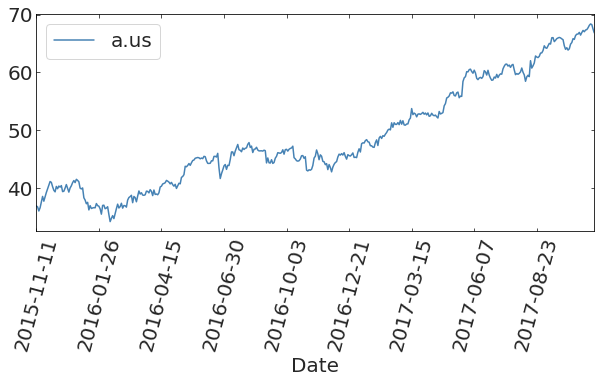

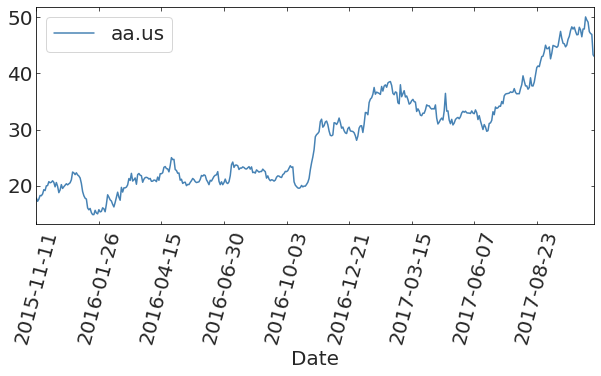

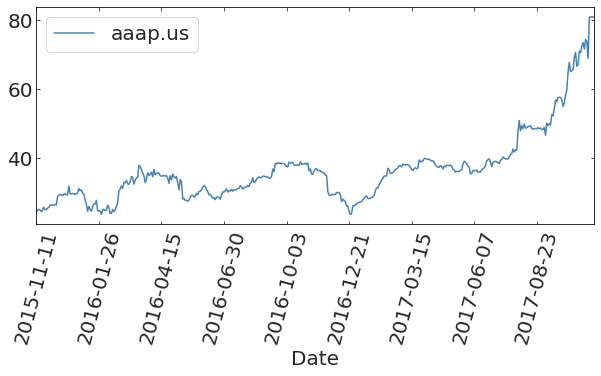

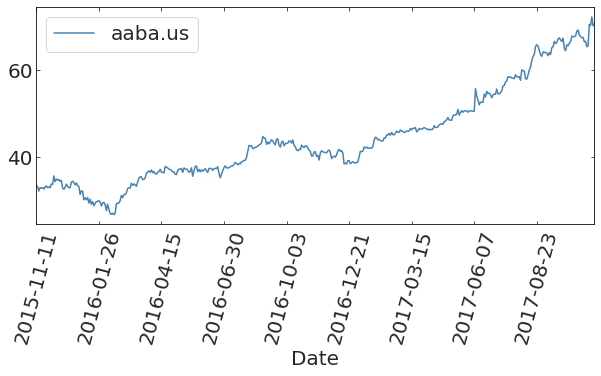

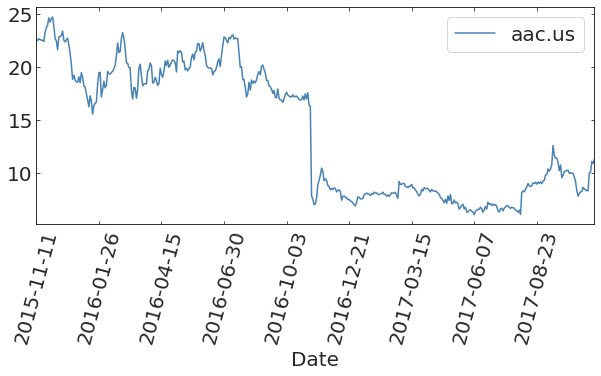

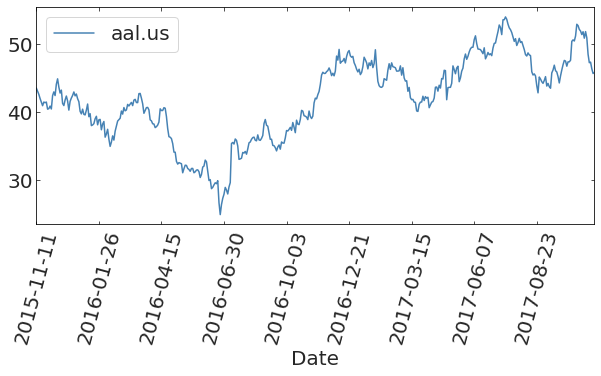

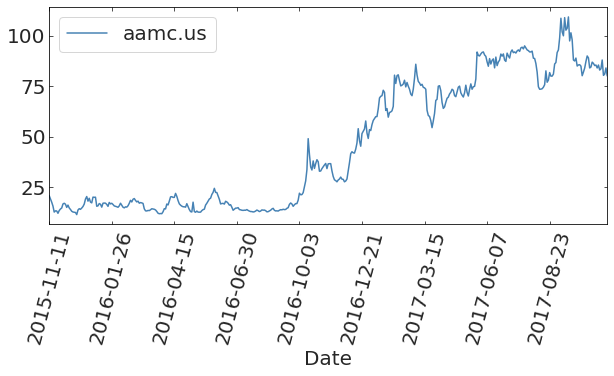

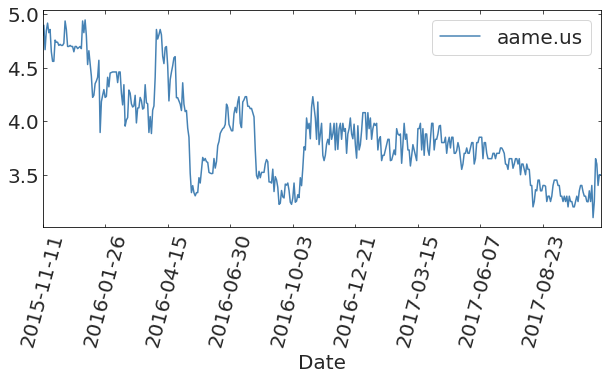

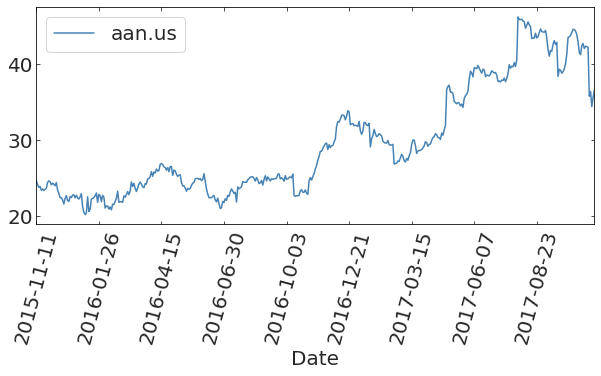

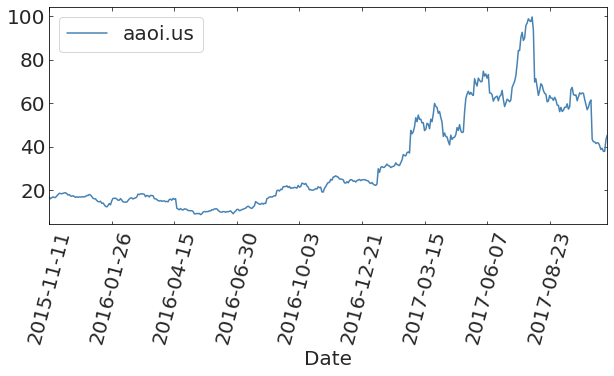

In [28]:
for col in v.columns:
  fig, ax = pl.subplots(figsize=(10,4))   # defines size of our plots
  v.plot(y=col, ax=ax, rot=75)   # rot = rotating the labels

Figure 1: Line graph over 2 years of 10 stock prices over time.

# **Visualizing Correlations**

In [0]:
from pandas.plotting import scatter_matrix

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


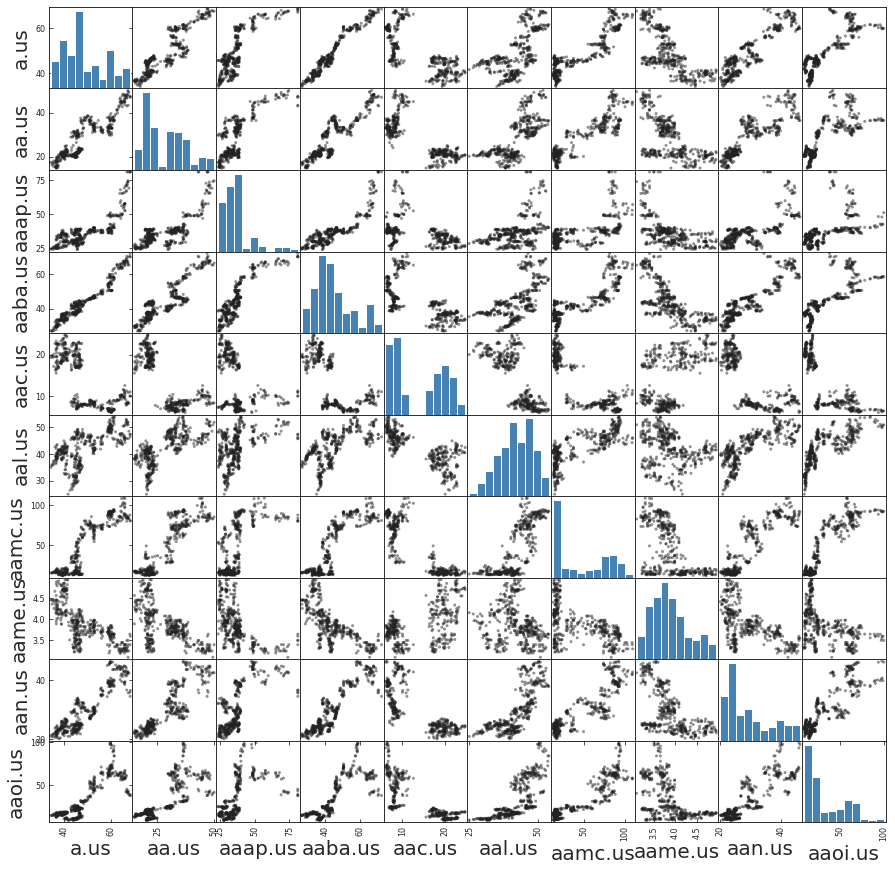

In [30]:
scatter_matrix(v, figsize=(15, 15), color="#222222")
pl.show()

Figure 2: Scatter matrix of the 10 stocks, illustrating the potential correlations between them.

In [31]:
v.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


Figure 3: Correlation matrix between the 10 stocks.

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


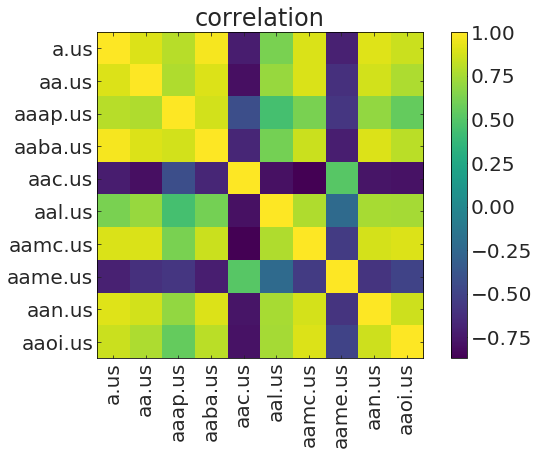

In [32]:
pl.imshow(v.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(v.columns)), v.columns, rotation=90)
pl.yticks(range(len(v.columns)), v.columns);

Figure 4: Heat map of the correlation matrix of the 10 stocks

# Testing for Stationarity

In [38]:
import statsmodels.api as sm

# NOTE: Null is that it is NOT stationary.  If we reject null, it's stationary.
for c in v.columns:
  print(c + " is stationary:", sm.tsa.stattools.adfuller(v[c])[1] < 0.05)
#sm.tsa.stattools.adfuller(v.iloc[:, 0])

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


The only stationary series is aame.us.

In [0]:
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

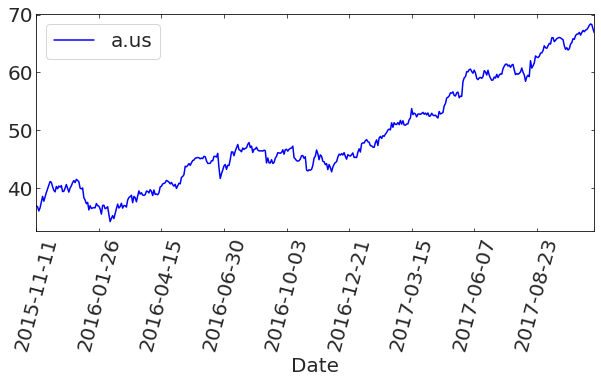

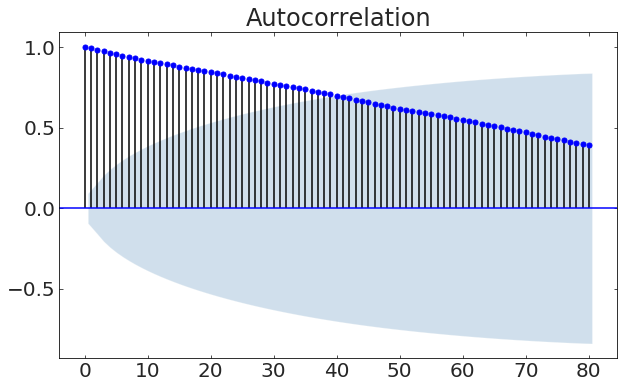

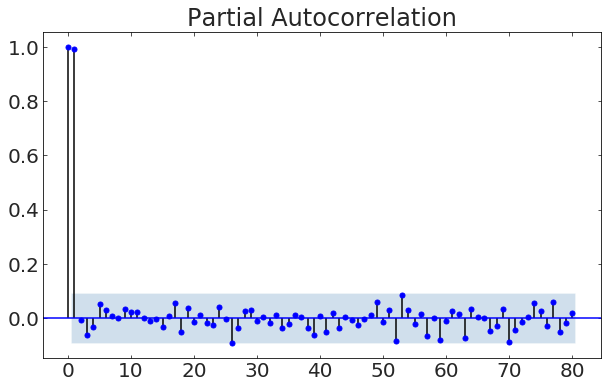

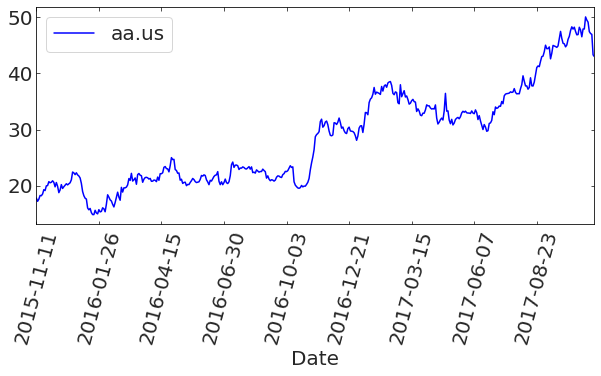

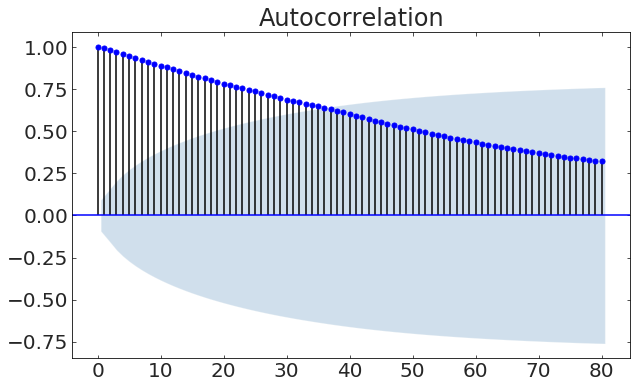

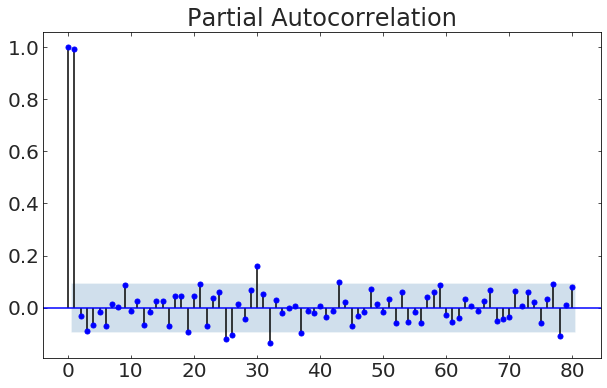

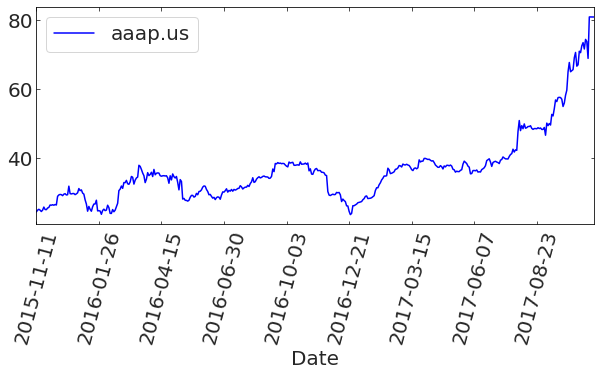

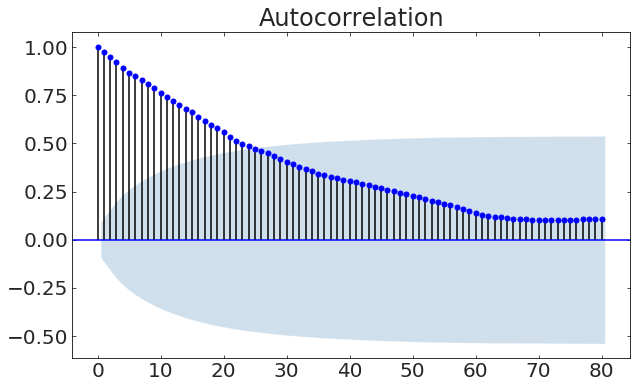

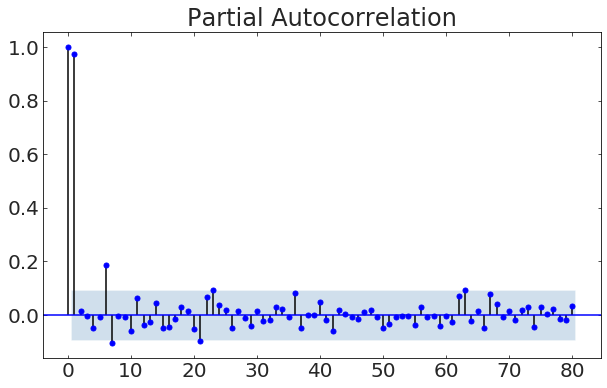

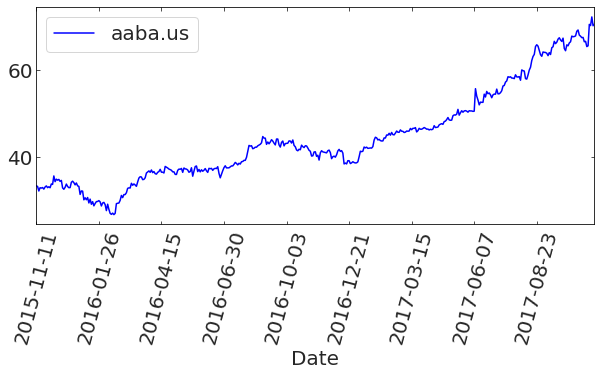

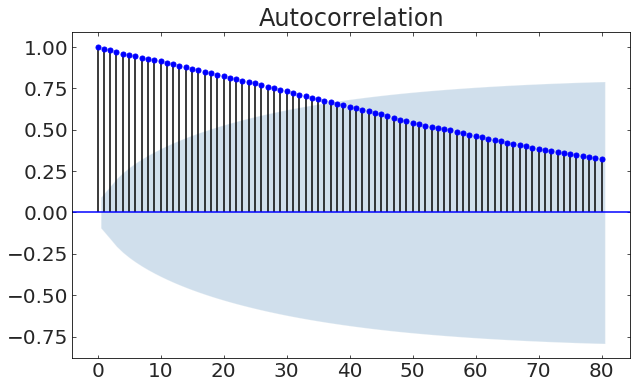

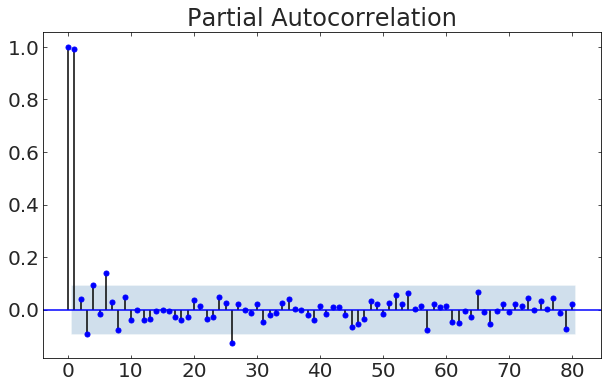

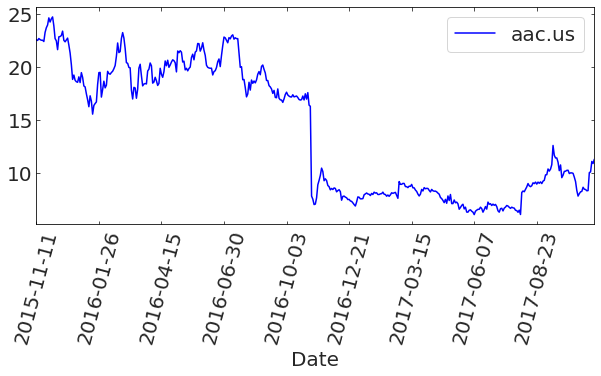

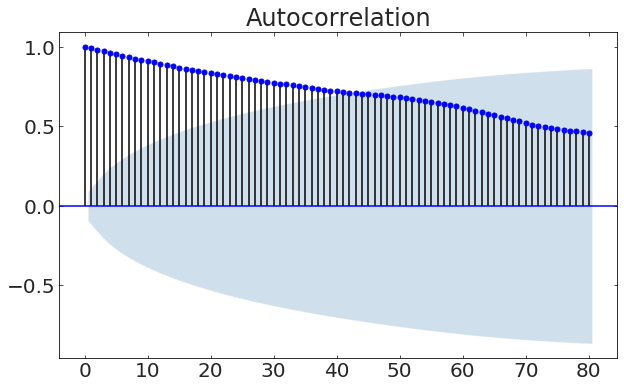

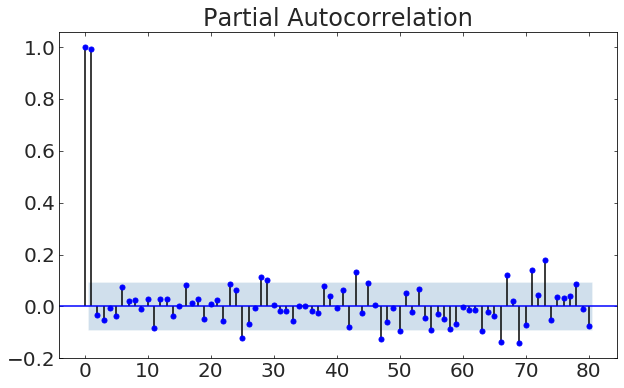

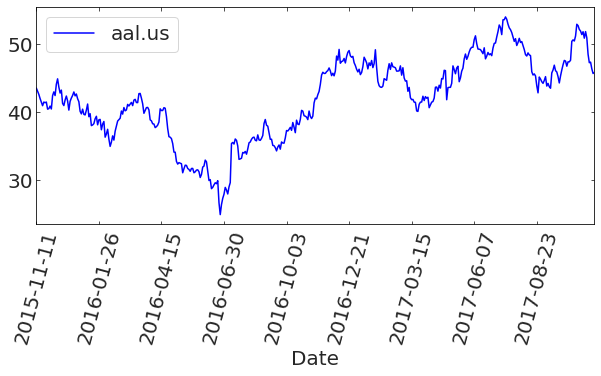

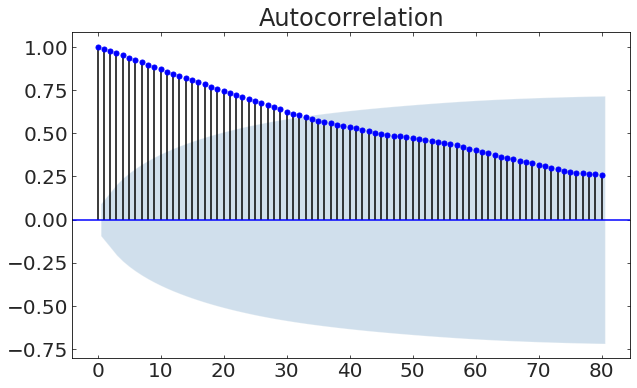

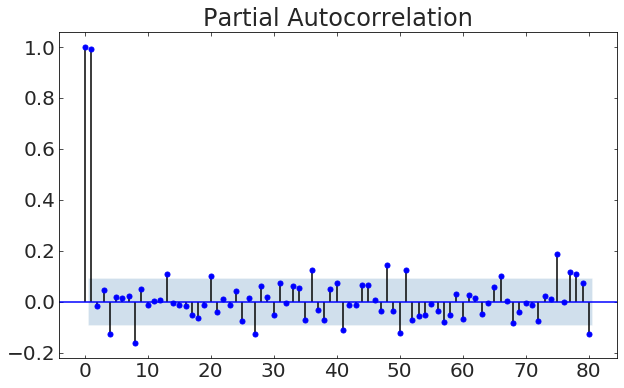

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


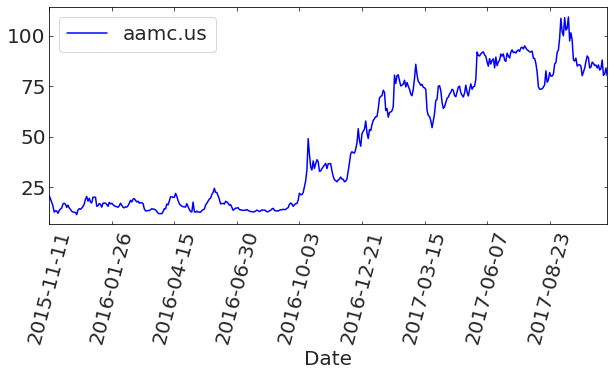

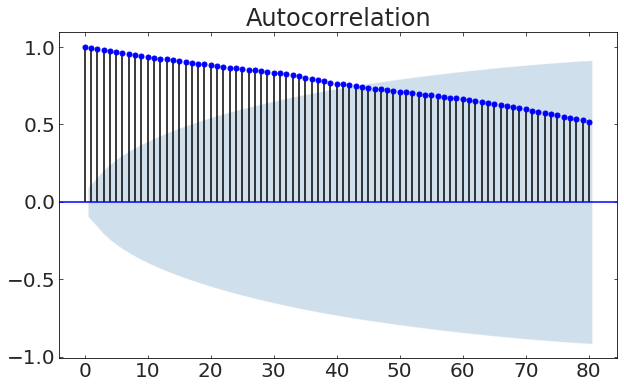

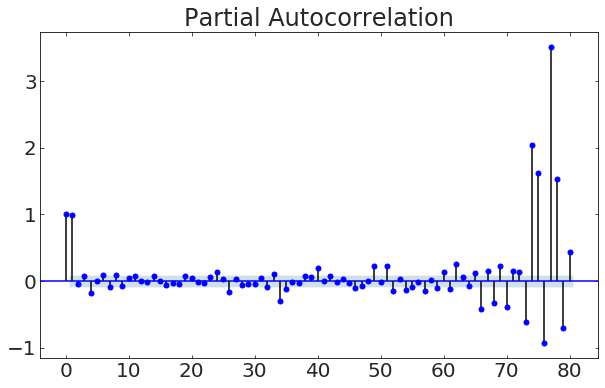

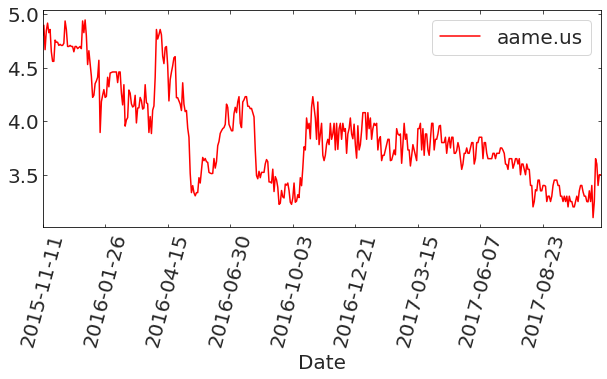

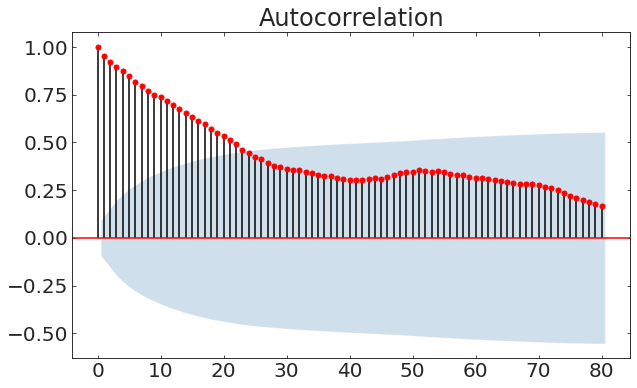

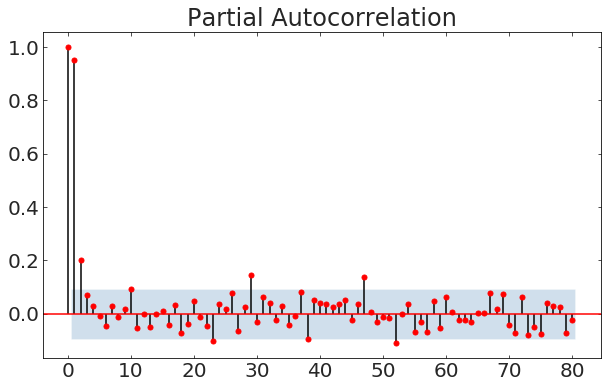

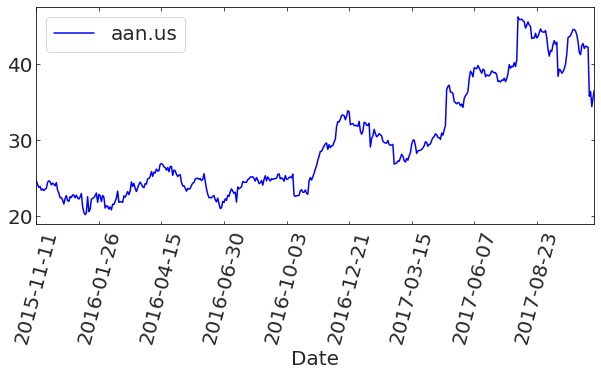

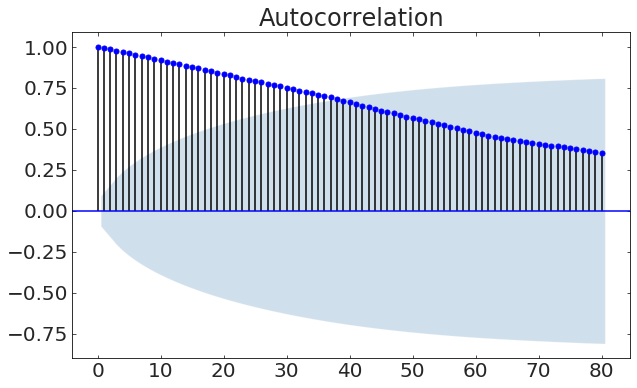

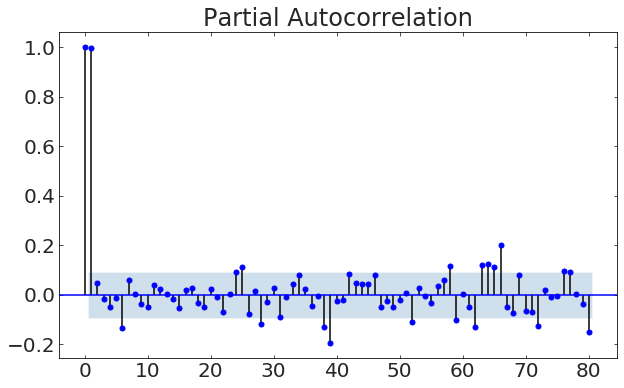

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


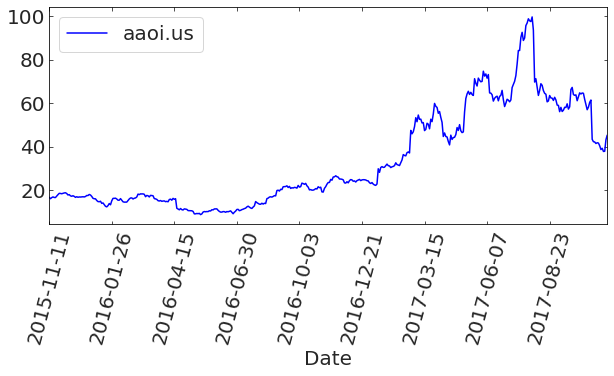

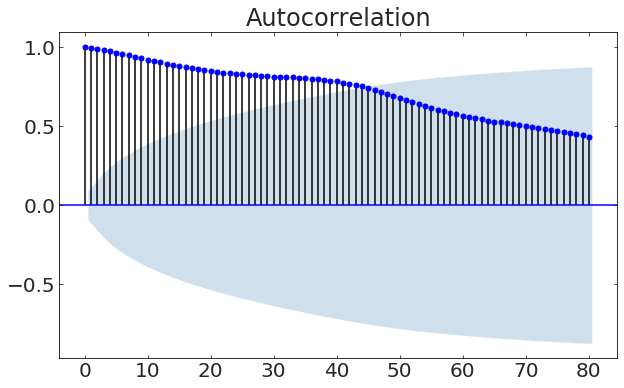

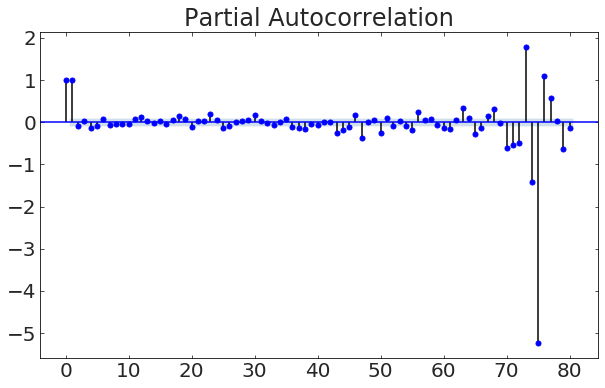

In [35]:
color = ['b', 'r']
col = np.zeros(10, dtype=int)
col[7] = 1
i = 0
for c in v.columns:
  fig, ax = pl.subplots(figsize=(10,4))   # defines size of our plots
  v.plot(y=c, ax=ax, rot=75, c=color[col[i]])   # rot = rotating the labels
  sm.graphics.tsa.plot_acf(v[c], lags=80, c=color[col[i]])
  sm.graphics.tsa.plot_pacf(v[c], lags=80, c=color[col[i]])
  pl.show()
  i = i+1

Figure 5: Illustration of the autocorrelations and partial autocorrelations of all time series.  The stationary series is colored in red.

# Finding the Optimal p and q Autocorrelation Values

In [40]:
a = np.zeros((5, 5))

for p in range(5):
  for q in range(5):
    try:
      mod = sm.tsa.ARMA(v['aame.us'].values, (p,q)).fit()
      #mod.plot_predict(dynamic=True, plot_insample=False)
      a[p][q] = mod.aic
    except:
      a[p][q] = NaN

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([1]), array([1]))


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [41]:
print("best parameters: ", np.where(a == np.nanmin(a)))

best parameters:  (array([1]), array([1]))


Thus, our best parameters are p=1 and q=1, representing an order-1 AR model and order-1 MA model to be forecasted on our series.

# Predicting the Future Values

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


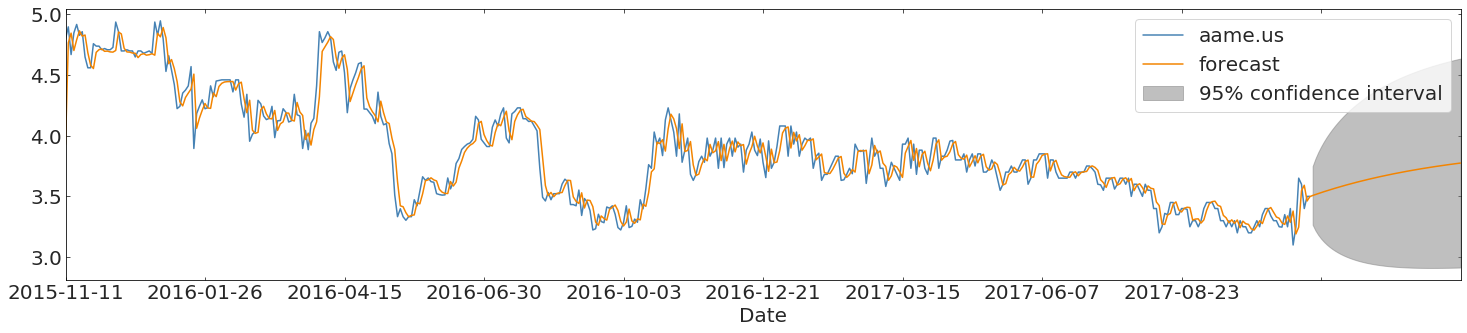

In [45]:
mod = sm.tsa.ARMA(v['aame.us'].values, (1,1)).fit()
ax = v[['aame.us']].plot(figsize=(25,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

Figure 6: Our forecast for the stationary time series using the ARMA model.  Note the signs of overfitting--the forecast looks like a 1-value delay of the original series.

# Forecasting Two Non-stationary Series with ARIMA

We'll use aaap.us and aac.us, which have a correlation of -0.42:

In [54]:
np.corrcoef(v["aaap.us"], v["aac.us"])

array([[ 1.        , -0.42302065],
       [-0.42302065,  1.        ]])

Now we'll be using ARIMA, which is what we need to use for non-stationary series since we need an integrative factor.  I'll do the same as before, but looping over the 3rd value as well.

In [66]:
# for aaap.us
a = np.zeros((5, 5, 5))

for p in range(5):
  for d in range(5):
    for q in range(5):
      try:
        mod = sm.tsa.ARIMA(v['aaap.us'].values, (p,d,q)).fit()
        #mod.plot_predict(dynamic=True, plot_insample=False)
        a[p][d][q.us.txt] = mod.aic
      except:
        a[p][d][q] = NaN

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [67]:
print("best parameters: ", np.where(a == np.nanmin(a)))

best parameters:  (array([2]), array([2]), array([4]))


So our parameters for aame.us are p=2 for AR, d=2 for I, q=4 for MA.  So, let's plot out fit:

Text(0.5, 1.0, 'Forecast for aaap.us')

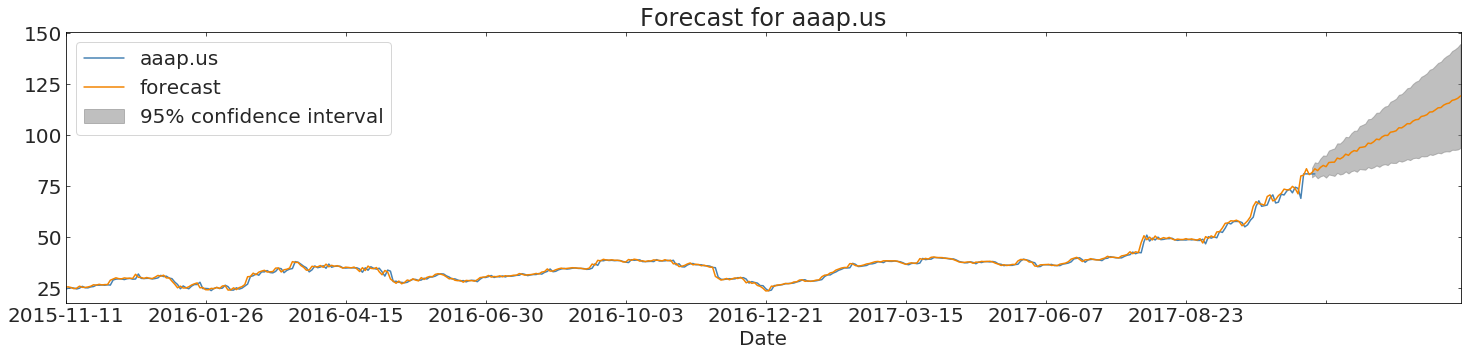

In [77]:
mod = sm.tsa.ARIMA(v['aaap.us'].values, (2, 2, 4)).fit()
ax = v[['aaap.us']].plot(figsize=(25,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);
pl.title("Forecast for aaap.us")

Figure 6: Our forecast for the non-stationary time series aaap.us using the ARIMA model, using parameters that minimized AIC. Note no major signs of overfitting on visual inspection.

Now we'll do it for aac.us:

In [74]:
# for aac.us
a = np.zeros((5, 5, 5))

for p in range(5):
  for d in range(5):
    for q in range(5):
      try:
        mod = sm.tsa.ARIMA(v['aac.us'].values, (p,d,q)).fit()
        #mod.plot_predict(dynamic=True, plot_insample=False)
        a[p][d][q] = mod.aic
      except:
        a[p][d][q] = NaN

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianI

In [75]:
print("best parameters: ", np.where(a == np.nanmin(a)))

best parameters:  (array([4]), array([1]), array([3]))


So our parameters for aac.us are p=4 for AR, d=1 for I, q=3 for MA.  So, let's plot out fit:

Text(0.5, 1.0, 'Forecast for aac.us')

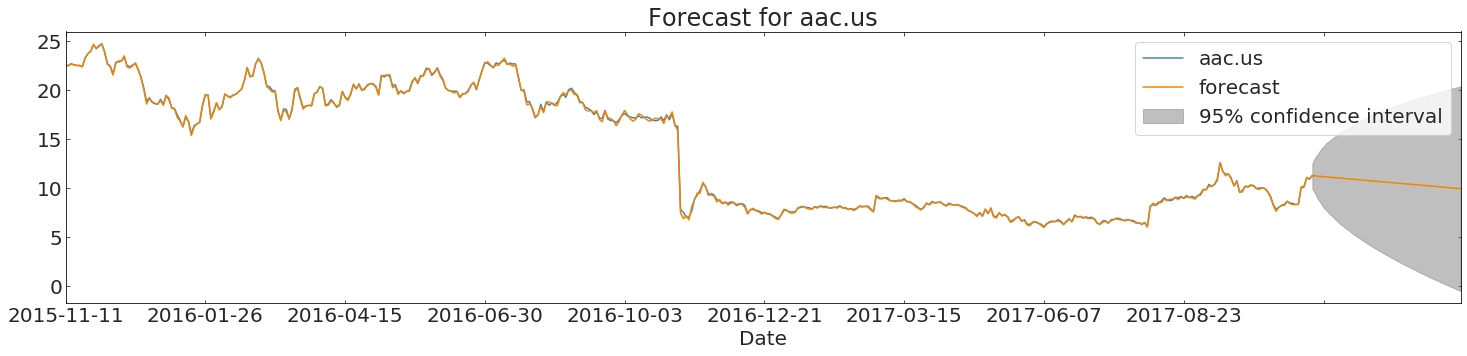

In [78]:
mod = sm.tsa.ARIMA(v['aac.us'].values, (4, 1, 3)).fit()
ax = v[['aac.us']].plot(figsize=(25,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);
pl.title("Forecast for aac.us")

Figure 7: Our forecast for the non-stationary time series aac.us using the ARIMA model.

# Refitting with a Different Order of Integration

I'll refit aac.us with d=2 and d=0 instead of d=1.

d = 0:

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'Forecast for aac.us')

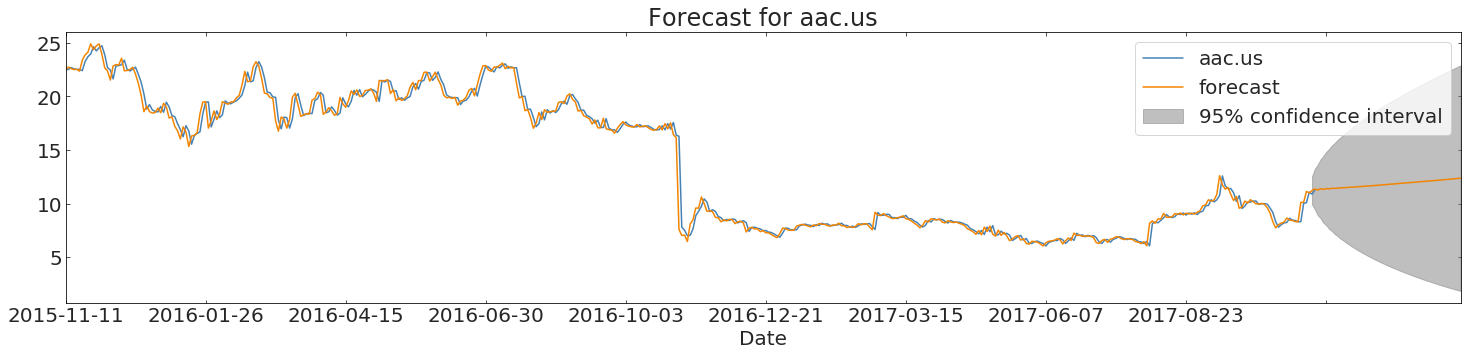

In [83]:
mod = sm.tsa.ARIMA(v['aac.us'].values, (4, 0, 3)).fit()
ax = v[['aac.us']].plot(figsize=(25,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);
pl.title("Forecast for aac.us for d=0")

Figure 7: Our forecast for the non-stationary time series aac.us using the ARIMA model.  Note that the forecast trails the real series by exactly 1 value, a potential sign of overfitting.

d = 2:

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'Forecast for aac.us')

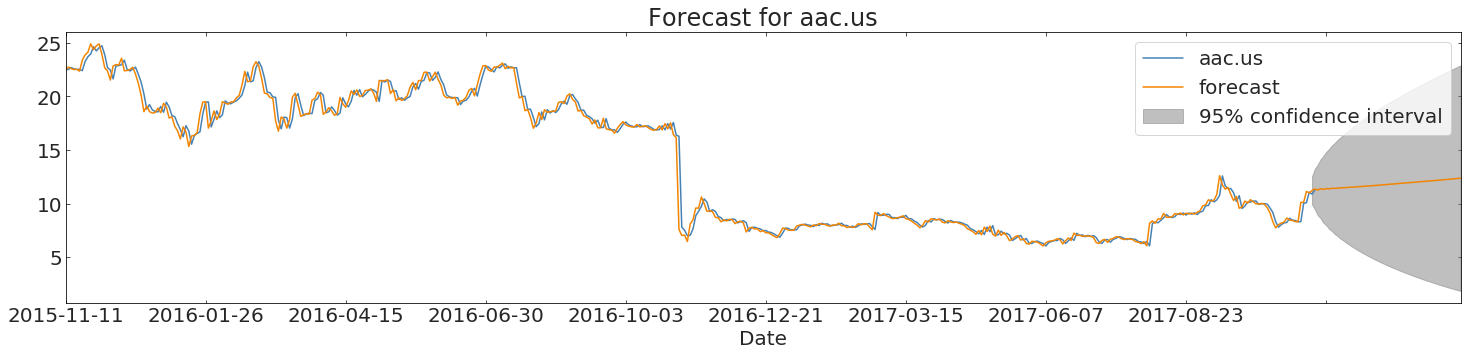

In [84]:
mod = sm.tsa.ARIMA(v['aac.us'].values, (4, 2, 3)).fit()
ax = v[['aac.us']].plot(figsize=(25,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);
pl.title("Forecast for aac.us for d=2")

Figure 8: Our forecast for the non-stationary time series aac.us using the ARIMA model. Note that the forecast trails the real series by exactly 1 value, a potential sign of overfitting.

In both cases, the time series didn't fit properly and overfit much more compared to the proper integrative factor.  I assume this is a case of overfitting, since being ahead of the series by 1 timestep is also a case of overfitting.  Therefore, without the proper integrative factor, much less signal can be obtained from the series.